In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import font_manager, rc

In [10]:
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

**회귀분석**

In [1]:
from scipy import stats
x = [3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
y = [2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]
result = stats.linregress(x,y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

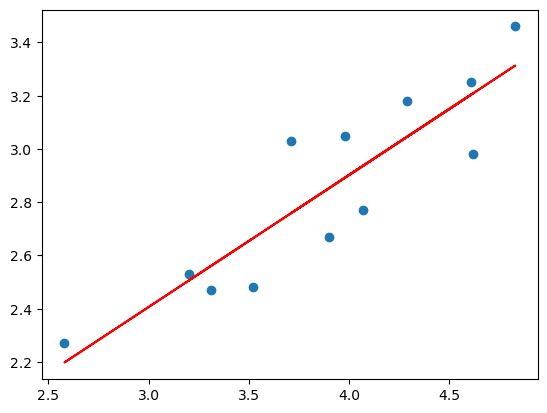

In [7]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
x1 = np.array(x)
plt.scatter(x,y)
plt.plot(x1, slope*x1+intercept, c='red')

In [11]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

**p value 구하기**

In [17]:
# 독립표본t검정
def independent_ttest(data1, data2):
    mean1, mean2 = mean(data1), mean(data2)
    # 모집단이 큰 경우 표본을 여러번 추출하게 되는데 추출할 때마다 표본들의 평균값이 달라지게 됨, 표본평균의 표준편차를 표준오차라고 함(sem 함수로 계산)
    se1, se2 = sem(data1), sem(data2)
    sed = sqrt(se1**2 + se2**2)

    # t 통계량(t statistic) 계산
    t_stat = (mean1 - mean2) / sed

    # 자유도(degrees of freedom) 계산(샘플개수-1)
    df = len(data1) + len(data2) - 2

    # p-value 계산(cdf 누적분포함수)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, p

In [15]:
#독립변수(입력값)
X=[3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71,
4.61, 3.9, 3.2] #전기생산량
#종속변수(출력값)
y=[2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03,
3.25, 2.67, 2.53] #전기사용량

#95% 신뢰수준
alpha = 0.05
t_stat, p = independent_ttest(X, y)
print('t=%.3f, p-value=%f' % (t_stat, p))

if p > alpha:
    print('p-value > 0.05, 귀무가설 채택, 대립가설 기각')
else:
    print('p-value < 0.05, 귀무가설 기각, 대립가설 채택')

t=4.752, p-value=0.000096
p-value < 0.05, 귀무가설 기각, 대립가설 채택


**회귀함수**

In [18]:
from sklearn.datasets import make_regression
# 사이킷런

In [19]:
#가상의 회귀분석 데이터 생성 함수
x, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, random_state=0, coef=True)
print(x[:5].flatten())
print(y[:5])
print(w)

[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [20]:
xx = np.linspace(-3, 3, 100) # -3~3, 100등분
y0 = w * xx + 100

Text(0.5, 1.0, 'regression')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


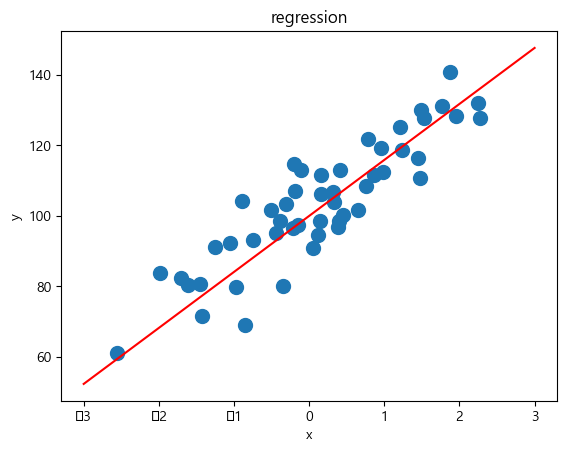

In [21]:
plt.plot(xx, y0, "r-")
plt.scatter(x, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression")

In [22]:
stats.linregress(X.flatten(),y.flatten())

LinregressResult(slope=13.919604870077004, intercept=101.71369654235306, rvalue=0.8904486561806709, pvalue=4.961237023315404e-18, stderr=1.0268067233914187, intercept_stderr=1.1646716810599185)

**최소자승법(OLS)**
* 잔차의 제곱의 합을 최소로 하는 방법 (잔차=실제값-예측값)

In [23]:
#OLS, Ordinary Least Squares
from sklearn.datasets import make_regression

In [24]:
bias = 100
X, y, w = make_regression(
 n_samples=200, n_features=1, bias=bias, noise=10,coef=True, random_state=1
)
print(X[:5])
print(y[:5])
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]
86.44794300545998


In [25]:
#사이킷런 패키지의 회귀분석 함수
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
#절편(상수항), 가중치(기울기)
print(model.intercept_, model.coef_)

99.79150868986945 [86.96171201]


In [26]:
#새로운 입력값에 대한 예측(2차원 배열로 입력해야 함)
model.predict([[-2], [-1], [0], [1], [2]])

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [27]:
print(X.flatten()[:5])
print(y[:5])

[ 0.23249456 -0.03869551  0.5505375   0.50318481  2.18697965]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]


In [29]:
import pandas as pd
df = pd.DataFrame({'x':X.flatten(), 'y':y})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [30]:
import statsmodels.api as sm

X = df[["x"]]
y = df[["y"]]

#최소자승법(OLS, Ordinary Least Squares)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              167.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    3.66e-28
Time:                        12:50:03   Log-Likelihood:                         -1204.0
No. Observations:                 200   AIC:                                      2410.
Df Residuals:                     199   BIC:                                      2413.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             99.6428      7.706     12.931      0.000      84.448     114.838
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.415
Skew:                           0.079   Prob(JB):                        0.813
Kurtosis:                       3.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#새로운 값 예측
result.predict([-2, -1, 0, 1, 2])

array([-199.28565959,  -99.64282979,    0.        ,   99.64282979,
        199.28565959])

In [32]:
#가중치(기울기)
result.params

x    99.64283
dtype: float64

In [33]:
#잔차(실제값과 예측값의 차이)
result.resid

0      104.712602
1       96.888644
2      107.000394
3       91.553292
4       65.343279
          ...    
195    105.055511
196    105.871796
197     70.418046
198     99.984395
199    100.673331
Length: 200, dtype: float64

Text(0, 0.5, 'Residual')

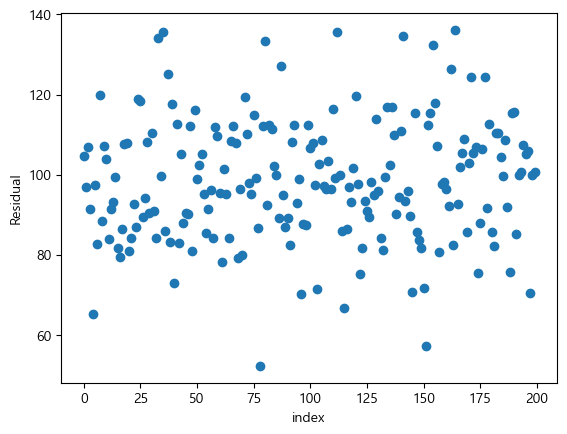

In [34]:
#잔차 벡터 그래프
%matplotlib inline
import matplotlib.pyplot as plt
result.resid.plot(style="o")
plt.xlabel("index")
plt.ylabel("Residual")

**회귀분석 모형의 성능 검증?**

In [35]:
X, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True,random_state=0)
dfX = pd.DataFrame(X, columns=["X"])
#dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
result.predict(dfX)

0    -17.934714
1     39.638175
2     14.893262
3    -37.478808
4    -40.694820
        ...    
95   -52.645684
96   -18.072076
97    12.912314
98   -71.981016
99   -53.312776
Length: 100, dtype: float64

In [36]:
# Total Sum of Square(종속변수 y의 분산)
print("TSS = ", result.uncentered_tss)
# Explained Sum of Square(예측값의 분산)
print("ESS = ", result.mse_model)
# Residual Sum of Square(잔차의 분산, 오차의 크기)
# 0에 가까울수록 좋은 모형
print("RSS = ", result.ssr)
# 결정계수: 모형의 설명력(0~1 사이의 값)
# 1- RSS/TSS=ESS/TSS
print("R squared=", result.rsquared)

TSS =  291345.75789830607
ESS =  188589.61349210917
RSS =  102754.33755137533
R squared= 0.6473091780922586


In [37]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           6.60e-24
Time:                        13:12:37   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4